In [1]:
# Imports
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from MultiplicativeBaseGame import *
from random import sample
import json
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [15]:
# Preprocess raw data
for name in ['additive', 'multiplicative']:
    res = load_ABG_simulation('../../results/HUR03/', f'HUR03-{name}')
    base_counts, num_bases, num_unique_bases, successes, params = res
    params = load_ABG_simulation('../../results/HUR03/', f'HUR03-{name}', params_only=True)

    df = pd.DataFrame([num_bases.mean(axis=0),
        num_bases.std(axis=0),
        num_unique_bases.mean(axis=0),
        num_unique_bases.std(axis=0),
        successes.mean(axis=0),
        successes.std(axis=0)]
        +base_counts.mean(axis=0).T.tolist()
        +base_counts.std(axis=0).T.tolist()).T

    # columns
    df.columns = pd.MultiIndex.from_tuples([
        ['num_bases', 'mean'], ['num_bases', 'std'],
        ['num_unique_bases', 'mean'], ['num_unique_bases', 'std'],
        ['successes', 'mean'], ['successes', 'std']
    ] + [(f'base-{b}', 'mean') for b in params['bases']]
      + [(f'base-{b}', 'std') for b in params['bases']])

    # Index
    df.index = arange(0, params['T'], params['res'])

    # Reorder
    df = df.reindex_axis(sorted(df.columns), axis=1)
    df.to_csv(f'../../results/HUR03/HUR03-{name}.csv')

In [2]:
# Read out plotdata
data_add = pd.read_csv('HUR03-additive.csv', header=[0,1], index_col=0)
data_mul = pd.read_csv('HUR03-multiplicative.csv', header=[0,1], index_col=0)
data_mul = data_mul.iloc[:len(data_add), :]
params = load_ABG_simulation('', 'HUR03-additive', params_only=True)

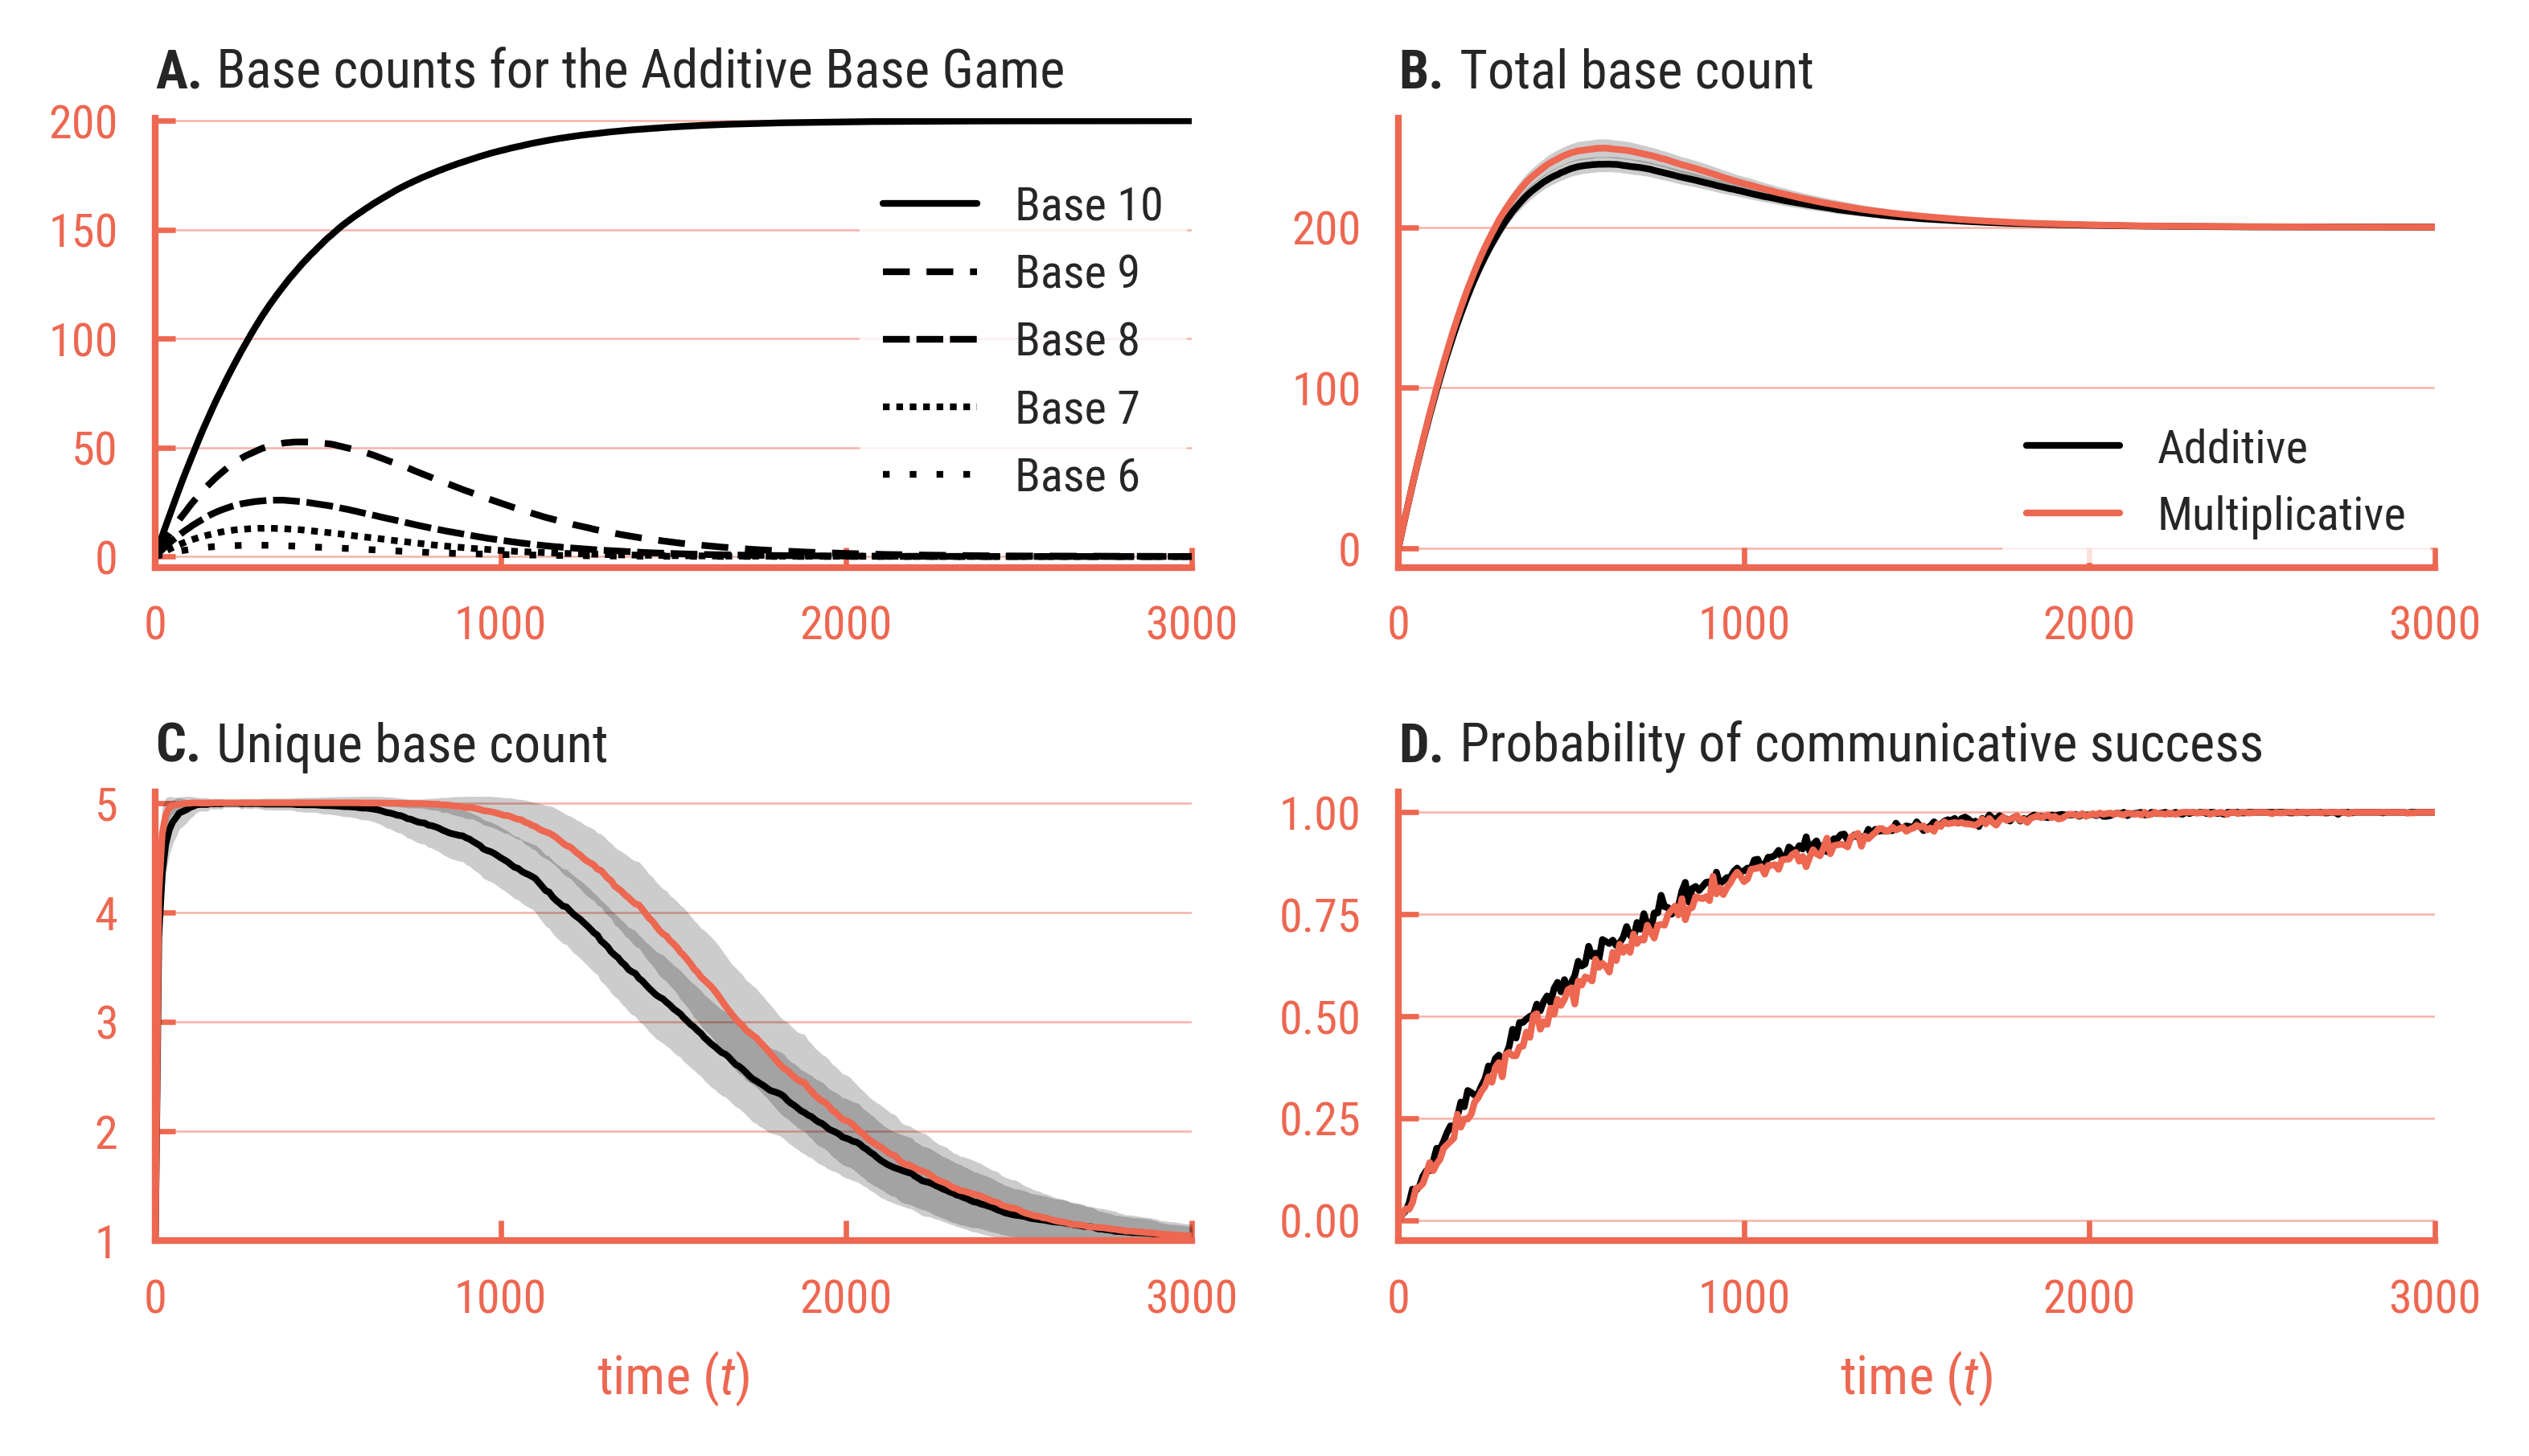

In [3]:
# Plot
figure(figsize=cm2inch(12,13))
xs = data_add.index
colors = {'add': '#000000', 'mul': '#ed6751'}
labels = {'add': 'Additive', 'mul': 'Multiplicative'}

def show_results(name, show_std=True):
    for exp, data in [('add',data_add), ('mul', data_mul)]:
        mean = data[name]['mean']
        std = data[name]['std']
        plot(xs, mean, label=labels[exp], color=colors[exp])
        if show_std:
            fill_between(xs, mean-.5*std, mean+.5*std, 
                     alpha=.2, facecolor='#000000', edgecolor='#ffffff')


ax1 = subplot(421)          
dashes = {6: (1,3), 7: (1,1), 8: (4,1), 9: (4,2.5), 10:()}
for i in range(5):
    b = i+6
    mean = data_add[f'base-{b}']['mean']
    plot(xs, mean, 'k', dashes=dashes[i+6], label='Base {}'.format(i+6))

_handles, _labels = gca().get_legend_handles_labels()
legend(_handles[::-1], _labels[::-1], loc=5)
title('Base counts for the Additive Base Game')      
ylim(-5,201)

if True:
    ax2 = subplot(422)
    show_results('num_bases')
    legend(loc=4)
    title('Total base count')

    ax3 = subplot(423)
    show_results('num_unique_bases')
    ylim(1, 5.1)
    title('Unique base count')
    xlabel('time ($t$)')

    ax4 = subplot(424)
    show_results('successes', show_std=False)
    ylim(-.05, 1.05)
    title('Probability of communicative success')
    xlabel('time ($t$)')

# Format axes
restyle_title(ax1, ax2, ax3, ax4)
for ax in [ax1, ax2, ax3, ax4]:
    ax.locator_params(nbins=5, axis='y')
    ax.locator_params(nbins=5, axis='x')
    ax.yaxis.grid()
    ax.set_xlim(0, 3000)
sns.despine()

subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=.5)
savefig('HUR03-results.pdf', bbox_inches='tight')
copyfig('HUR03-results.pdf')